## Project: BASEBALL DATA ANALYSIS
### By: Chaitanya Narayanavaram

In this project, I am going to analyze data from the Baseball Data Bank, to come up with usefull statistics that will help us get a better look at the performances of Teams, Players and Managers.
In each analysis below, first I have posed a question about the data, then I have analyzed the data using Python libraries- Numpy, Pandas, Seaborn, Matplotlib to find an answer to the posed question. I have used graphs to display the resuts in some analyses, to get a better look at the performances.

First I will import all the libraries I will use in this project below, so that I need not worry about importing them while working through the project.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Analysis 1:
Question: Which Baseball Team performed the best in the East Division?

Assumptions: Team performance in this analysis is measured in terms of "Mean Rank" in these years. 


In [114]:
# Data Wrangling: To read the contents of csv into dataframe
teams_df = pd.read_csv('Teams.csv')
east_division = teams_df.query('divID == "E"')

First, lets explore the data in our dataframe

In [115]:
# Exploring the data
east_division.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1518,1969,AL,BAL,BAL,E,1,162,81.0,109,53,...,145.0,0.984,Baltimore Orioles,Memorial Stadium,1062069.0,101,99,BAL,BAL,BAL
1519,1969,AL,BOS,BOS,E,3,162,81.0,87,75,...,178.0,0.975,Boston Red Sox,Fenway Park II,1833246.0,107,106,BOS,BOS,BOS
1522,1969,NL,CHN,CHC,E,2,163,82.0,92,70,...,149.0,0.979,Chicago Cubs,Wrigley Field,1674993.0,113,112,CHC,CHN,CHN
1524,1969,AL,CLE,CLE,E,6,161,81.0,62,99,...,153.0,0.976,Cleveland Indians,Cleveland Stadium,619970.0,103,103,CLE,CLE,CLE
1525,1969,AL,DET,DET,E,2,162,81.0,90,72,...,130.0,0.979,Detroit Tigers,Tiger Stadium,1577481.0,105,104,DET,DET,DET


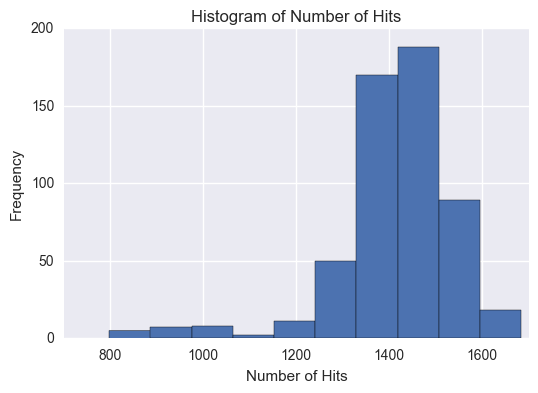

In [116]:
# Histogram of hits by batters:
plt.hist(east_division.H.dropna())
plt.xlabel("Number of Hits")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Hits")

In [117]:
east_division.H.describe()

count     548.000000
mean     1414.401460
std       127.712898
min       797.000000
25%      1361.000000
50%      1425.500000
75%      1492.000000
max      1684.000000
Name: H, dtype: float64

Description: The above histogram of hits by batters shows that this distribution is negatively skewed with mean = 1414.4, max = 1684, min = 797.

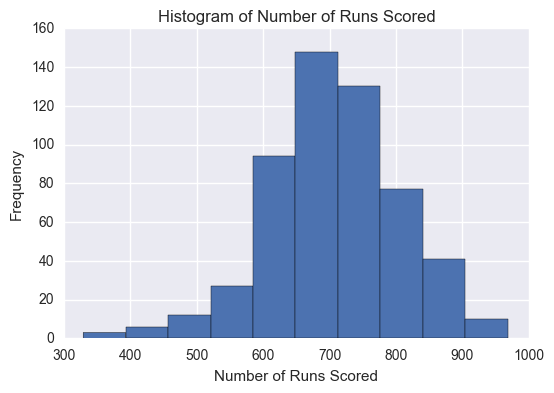

In [118]:
# Histogram of runs scored by batters:
plt.hist(east_division.R.dropna(), 10)
plt.xlabel("Number of Runs Scored")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Runs Scored")

In [119]:
east_division.R.describe()

count    548.000000
mean     707.452555
std       99.538200
min      329.000000
25%      645.750000
50%      707.500000
75%      772.000000
max      968.000000
Name: R, dtype: float64

Description: The above histogram of Runs scored by players shows that the distribution is slightly negatively skewed, with mean=707.45, min=329, max=968.

[<matplotlib.text.Text at 0x16267e48>, <matplotlib.text.Text at 0x16448668>]

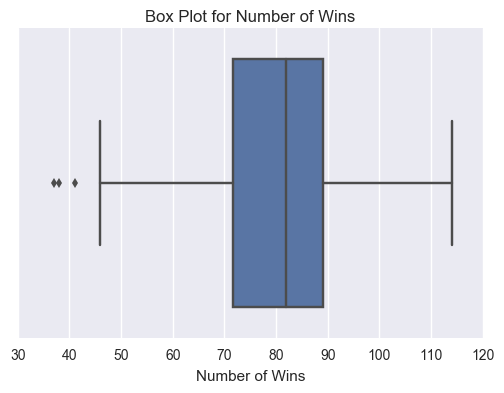

In [120]:
# Box plot of wins column:
fig = sns.boxplot(east_division.W.dropna())
fig.set(xlabel = 'Number of Wins', title = 'Box Plot for Number of Wins')

Description: This boxplot of Wins by teams shows the variation of data in the 'Wins' column of our dataframe. We can observe that the approximate values of:
maximum = 115, third quartile = 89, median = 82, first quartile = 71, minimum = 47. We can also see 3 outliers below the minimum value.
Similarly, below is the boxplot for the 'Loss' column:

[<matplotlib.text.Text at 0x1a409550>, <matplotlib.text.Text at 0x1a52ecc0>]

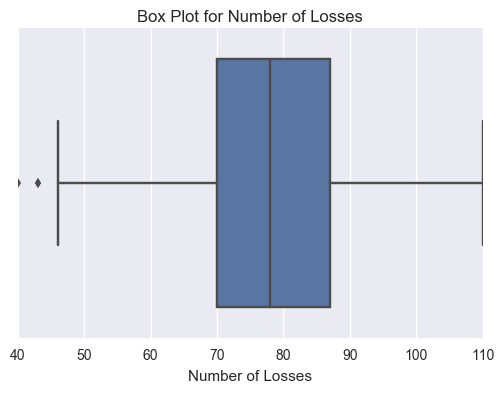

In [121]:
# Box plot for loss:
fig = sns.boxplot(east_division.L.dropna())
fig.set(xlabel = 'Number of Losses', title = 'Box Plot for Number of Losses')

Description: The boxplot above shows the variation of data in the Losses column of our Dataframe. We can see that the max = 110, min = 46, median = 79, First quartile = 70, Third quartile = 88. We can also see 2 outliers below the minimum value.

Now, Lets check for missing values in our dataframe:

In [122]:
# Check which columns have missing values:

east_division.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 1518 to 2834
Data columns (total 48 columns):
yearID            548 non-null int64
lgID              548 non-null object
teamID            548 non-null object
franchID          548 non-null object
divID             548 non-null object
Rank              548 non-null int64
G                 548 non-null int64
Ghome             548 non-null float64
W                 548 non-null int64
L                 548 non-null int64
DivWin            538 non-null object
WCWin             220 non-null object
LgWin             538 non-null object
WSWin             538 non-null object
R                 548 non-null int64
AB                548 non-null int64
H                 548 non-null int64
2B                548 non-null int64
3B                548 non-null int64
HR                548 non-null int64
BB                548 non-null int64
SO                548 non-null float64
SB                548 non-null float64
CS                548 non-

We observe that DivWin, WCWin, LgWin, WSWin, HBP and SF have a few missing values.
Let's see what values are filled in these columns:

In [123]:
print east_division.DivWin.value_counts()
print east_division.WCWin.value_counts()
print east_division.LgWin.value_counts()
print east_division.WSWin.value_counts()
print east_division.HBP.value_counts()
print east_division.SF.value_counts()

N    442
Y     96
Name: DivWin, dtype: int64
N    195
Y     25
Name: WCWin, dtype: int64
N    492
Y     46
Name: LgWin, dtype: int64
N    513
Y     25
Name: WSWin, dtype: int64
54.0    12
55.0     8
56.0     7
53.0     6
63.0     6
45.0     6
51.0     6
47.0     5
58.0     5
69.0     5
57.0     5
42.0     5
64.0     4
44.0     4
72.0     4
60.0     4
49.0     4
67.0     4
59.0     4
73.0     4
62.0     4
52.0     3
68.0     3
70.0     3
39.0     3
43.0     3
74.0     3
46.0     3
35.0     3
36.0     3
41.0     2
66.0     2
89.0     2
61.0     2
71.0     2
90.0     2
65.0     2
48.0     2
50.0     2
80.0     2
28.0     1
34.0     1
38.0     1
29.0     1
82.0     1
77.0     1
78.0     1
95.0     1
81.0     1
40.0     1
84.0     1
Name: HBP, dtype: int64
49.0    11
45.0    10
40.0    10
42.0     9
47.0     8
46.0     7
52.0     7
41.0     7
43.0     7
39.0     7
50.0     6
36.0     6
51.0     6
30.0     5
56.0     5
38.0     5
48.0     5
34.0     5
35.0     5
55.0     4
54.0     4
44.0   

Wee see that, for the columns DivWin, WCWin, LgWin and WSWin, the values are 'Y' and 'N'. It looks like the default value is 'N', so I will fill the missing values in these columns with 'N'. 
For the columns HBP and SF, the values are numeric values. So, I will fill the missing values in these columns with the mean of the respective column.

In [125]:
# Handling the missing values in east_division dataframe:
east_division['DivWin'].fillna('N', inplace=True)
east_division['WCWin'].fillna('N', inplace=True)
east_division['LgWin'].fillna('N', inplace=True)
east_division['WSWin'].fillna('N', inplace=True)
east_division['HBP'].fillna(east_division['HBP'].mean(), inplace=True)
east_division['SF'].fillna(east_division['SF'].mean(), inplace=True)

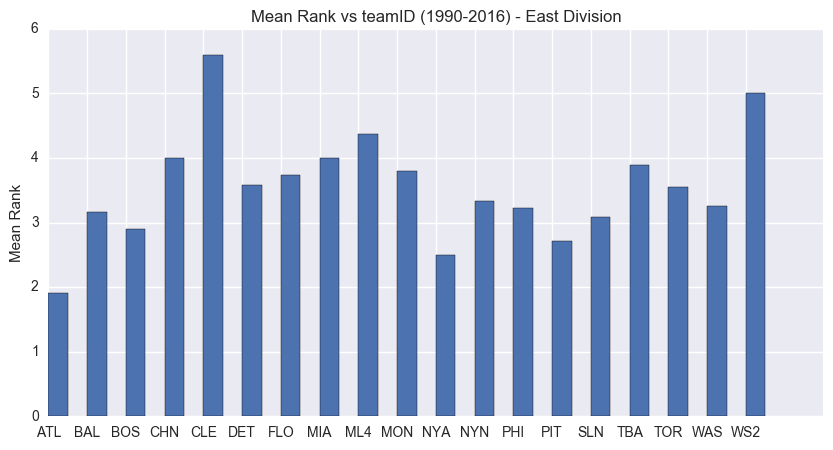

In [127]:
# Now, let's analyze the data to answer the posed question
grouped_by_teamID = east_division.groupby('teamID', as_index=False).mean()
# Below, I am plotting a bar graph- Mean Rank vs teamID
%matplotlib inline
import matplotlib.font_manager as fm
fig = plt.figure(figsize=(10,5))
# The above line of code adjusts the size of the bar graph so that 
# all the teamIDs fit on the x-axis
x_pos = np.arange(len(grouped_by_teamID['teamID']))
# Setting x-ticks to TeamID
plt.bar(x_pos, grouped_by_teamID['Rank'], align='edge', width=0.5)
plt.xticks(x_pos, grouped_by_teamID['teamID'])
plt.ylabel('Mean Rank')
plt.title('Mean Rank vs teamID (1990-2016) - East Division')

In the bar graph above, we see that the team abbreviated __'ATL'__ has performed the best as it has the least Mean Rank. 
The above graph shed light on other performance statistics like, which team performed the worst in the East Division ('CLE', as it has the highest mean rank). 
We can also get an idea how each team performed compared to other teams in the East Division by comparing the length of the bars.

One important thing to note in the above bar graph is that the team corresponding to the smallest bar (least mean rank) is the best performing team and vice versa. Below, I have tabulated this data to get a better understanding:

In [128]:
mean_rank = east_division.groupby('teamID')['Rank'].mean()
mean_rank.sort_values().to_frame()

,Rank
teamID,
ATL,1.913043
NYA,2.500000
PIT,2.720000
BOS,2.895833
SLN,3.080000
BAL,3.166667
PHI,3.229167
WAS,3.250000
NYN,3.333333


In the table above, the teams are arranged in the order of mean rank so that the top most team is the best performer, where as the bottom most team is the worst.

In [129]:
# To find the name of the team that has the least mean rank, or in other words, the best performer.
least_mean_rank = grouped_by_teamID['Rank'].argmin()
best_TeamID = grouped_by_teamID.iloc[least_mean_rank]['teamID']
print "Name of the best performing team: ", teams_df.loc[teams_df['teamID'] == best_TeamID]['name'].unique()

Name of the best performing team:  ['Atlanta Braves']


Thus, the team __'Atlanta Braves'__ has performed the best in the East Division.


Limitations to this Analysis:
1. I have assumed that the best performance means the team with the least mean rank as I think that rank is the best indicator of performance. However, there can be other means of measuring performnace which could result in different results.
2. I have chosen to analyze the East Division as I have found out on the internet that this division has more popular teams. We can just change one line of code: `east_division = teams_df.query('divID == "E"')` to look at any other division.
3. I have chosen data after the year 1990 so as to visualization of performance can be easier as fewer number of teams are involved in this analysis.

### Analysis 2:

Question: Does the Player's batting hand affect his performance ?

Assumptions: Here, the player's performance is measured in terms of Mean Hits, Runs and Home runs scored.
So, we are looking at the relation between player's batting hand to the Mean Hits, Runs and Home runs scored.

In [130]:
master_df = pd.read_csv('Master.csv')
batting_df = pd.read_csv('Batting.csv')
player_stats = master_df.merge(batting_df, on = 'playerID', how = 'inner')
# I am merging the above 2 dataframes so that I can get all the values and variables I need for analysis in one dataframe

In [131]:
# Let's explore this data:
player_stats.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


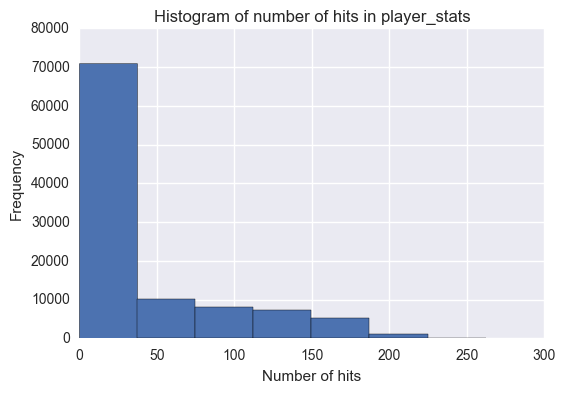

In [132]:
# Histogram of hits:
plt.hist(player_stats.H.dropna(), 7)
plt.xlabel('Number of hits')
plt.ylabel('Frequency')
plt.title('Histogram of number of hits in player_stats')

In [133]:
player_stats.H.describe()

count    102816.000000
mean         37.139930
std          52.603757
min           0.000000
25%           0.000000
50%           9.000000
75%          58.000000
max         262.000000
Name: H, dtype: float64

Description: The above histogram of number of hits shows that this is a positively scored distribution. This is understandable because there will be a lot of players with hits = 0 (min = 0 & First quartile = 0). 

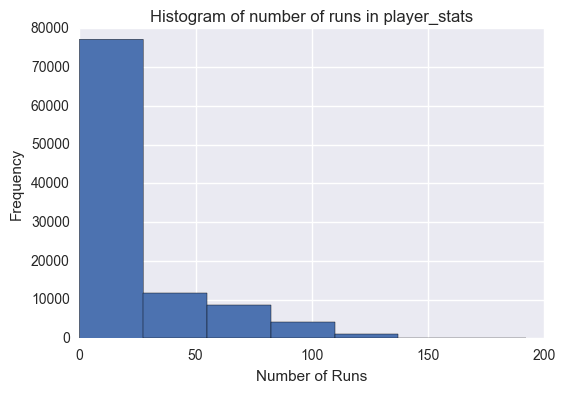

In [134]:
# Histogram of Runs:
plt.hist(player_stats.R.dropna(), 7)
plt.xlabel('Number of Runs')
plt.ylabel('Frequency')
plt.title('Histogram of number of runs in player_stats')

In [135]:
player_stats.R.describe()

count    102816.000000
mean         18.815544
std          28.242983
min           0.000000
25%           0.000000
50%           4.000000
75%          27.000000
max         192.000000
Name: R, dtype: float64

Description: The above histogram of number of runs shows that this is a positively scored distribution. This is understandable because there will be a lot of players with runs = 0 (min = 0 & First quartile = 0). 

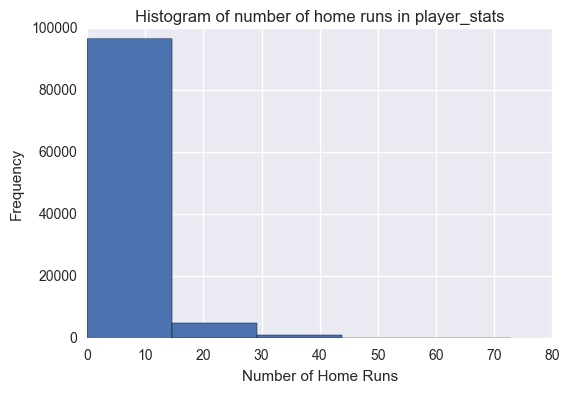

In [136]:
plt.hist(player_stats.HR.dropna(), 5)
plt.xlabel('Number of Home Runs')
plt.ylabel('Frequency')
plt.title('Histogram of number of home runs in player_stats')

In [137]:
player_stats.HR.describe()

count    102816.000000
mean          2.813599
std           6.304919
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          73.000000
Name: HR, dtype: float64

Description: The above histogram of number of home runs shows that this is a positively scored distribution. This is understandable because there will be a lot of players with home runs = 0 (min = 0 & First quartile = 0, median = 0). 

In [138]:
# To check which columns are missing values:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102816 entries, 0 to 102815
Data columns (total 45 columns):
playerID        102816 non-null object
birthYear       102648 non-null float64
birthMonth      102284 non-null float64
birthDay        101928 non-null float64
birthCountry    102733 non-null object
birthState      99653 non-null object
birthCity       102402 non-null object
deathYear       44160 non-null float64
deathMonth      44159 non-null float64
deathDay        44157 non-null float64
deathCountry    44149 non-null object
deathState      43953 non-null object
deathCity       44125 non-null object
nameFirst       102778 non-null object
nameLast        102816 non-null object
nameGiven       102778 non-null object
weight          101632 non-null float64
height          101691 non-null float64
bats            100894 non-null object
throws          101344 non-null object
debut           102810 non-null object
finalGame       102810 non-null object
retroID         102816 non-nul

Above, we see that there are many columns with missing values. Thus, I will extract the columns I require in my analysis into a new dataframe "player_stats_filtered" so that I can handle missing values of data that I require for my analysis.

In [139]:
player_stats_filtered = player_stats[['bats', 'H', 'R', 'HR']]
player_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102816 entries, 0 to 102815
Data columns (total 4 columns):
bats    100894 non-null object
H       102816 non-null int64
R       102816 non-null int64
HR      102816 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.9+ MB


We see that there are a few null values in 'bats'. Let's look at these entires closely.

In [140]:
player_stats_filtered[pd.isnull(player_stats_filtered['bats'])]

,bats,H,R,HR
153,NaN,0,0,0
433,NaN,1,0,0
568,NaN,2,1,0
706,NaN,1,1,0
1124,NaN,18,8,0
1133,NaN,2,0,0
1216,NaN,15,11,0
1217,NaN,40,28,0
1218,NaN,23,13,0
1219,NaN,32,12,0


There are 1922 entries with null values in 'bats'. Now, let's see what are the unique values of player's battaing hands in our data:

In [141]:
# To see what are the values of player's batting hands in our data:
player_stats_filtered['bats'].unique()

array(['R', 'L', nan, 'B'], dtype=object)

Filling up nan's with either R/L/B would not be the right approach as it is impossible to predict what that particular player's playing hand is. So, I will drop these particular entries instead.

In [142]:
player_stats_filtered.dropna(inplace=True)

C:\Users\chait\Anaconda3\envs\DAND\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [143]:
player_stats_filtered['bats'].value_counts()
# Here we see that I have eliminated the nan values

R    64823
L    28546
B     7525
Name: bats, dtype: int64

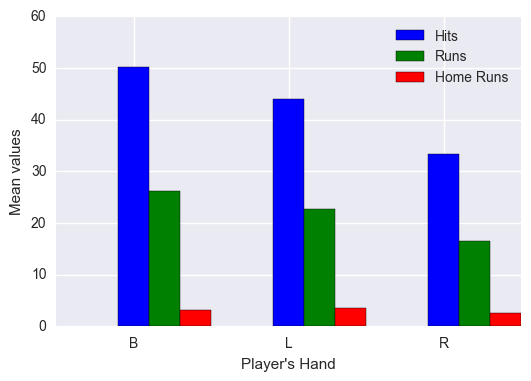

In [144]:
grouped_by_batting_hand = player_stats_filtered.groupby('bats')
# Below I will plot a bar graph for player's hand vs mean hits, runs and home runs
x_pos = np.arange(len(grouped_by_batting_hand['bats']))
w = 0.2
# width of the bars in my bar chart
plt.bar(x_pos, grouped_by_batting_hand.mean()['H'], label='Hits', color='Blue', align='center', width = w)
plt.bar(x_pos+w, grouped_by_batting_hand.mean()['R'], label='Runs', color='Green', align='center', width = w)
plt.bar(x_pos+(w*2), grouped_by_batting_hand.mean()['HR'], label='Home Runs', color='Red', align='center', width = w)
plt.xticks(x_pos, [ind for ind, grp in grouped_by_batting_hand['bats']])
# Setting x-ticks to Player's Hands i.e, B,L,R
plt.xlabel("Player's Hand")
plt.ylabel("Mean values")
plt.legend()

From the above bar chart, we can observe the following:
1. The mean home runs scored is almost the same for all three values of player's batting hand. 
2. Players who bat with right hand have the least mean runs and hits scored. Players who bat with left hand have slightly higher mean values for hits and runs whereas the players who can bat with both hands have higher mean values.
3. This shows that player's batting hand has an affect on the hits and runs they score, but not the home runs they score.

### Analysis 3:
Question: Does the player's throwing hand affect his performance ?

Assumptions: Here, the player's performance is measured in terms of mean Hits, Homeruns allowed and Strikeouts. So, we are looking at the relation between player's throwing hand to the mean Hits, Homeruns allowed and Strikeouts.

In [145]:
pitching_df = pd.read_csv("Pitching.csv")
pitching_stats = master_df.merge(pitching_df, on = 'playerID', how = 'inner')
# I am merging the above 2 dataframes so that I can get all the values and variables I need for analysis in one dataframe

In [146]:
# Let's explore this data:
pitching_stats.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,2.0,0,61.0,5.0,8,0.0,1.0,1.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,1.0,1.0,0,225.0,9.0,25,1.0,3.0,2.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,3.0,2.0,1.0,0,151.0,7.0,24,2.0,1.0,1.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,2.0,3.0,5.0,0,228.0,7.0,32,3.0,2.0,4.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,3.0,2.0,0.0,0,296.0,53.0,23,2.0,1.0,2.0


In [147]:
print "Descriptive stats for hits:"
print pitching_stats.H.describe()
print "Descriptive stats for home runs:"
print pitching_stats.HR.describe()

Descriptive stats for hits:
count    44963.000000
mean        84.912439
std         84.589269
min          0.000000
25%         18.000000
50%         55.000000
75%        134.000000
max        772.000000
Name: H, dtype: float64
Descriptive stats for home runs:
count    44963.000000
mean         6.434201
std          6.988237
min          0.000000
25%          1.000000
50%          4.000000
75%          9.000000
max         50.000000
Name: HR, dtype: float64


[<matplotlib.text.Text at 0x12d82240>, <matplotlib.text.Text at 0xf406630>]

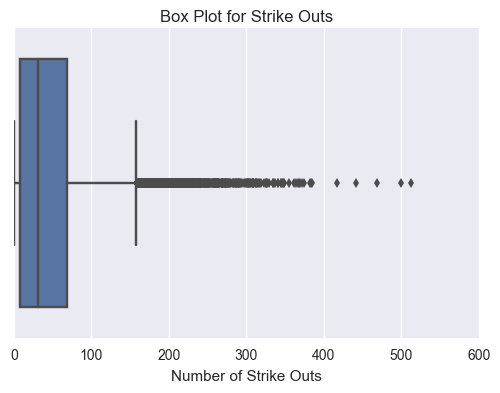

In [148]:
# Box plot for Strike outs:
fig = sns.boxplot(pitching_stats.SO.dropna())
fig.set(xlabel = 'Number of Strike Outs', title = 'Box Plot for Strike Outs')

In [149]:
pitching_stats.SO.describe()

count    44963.000000
mean        46.500856
std         49.345046
min          0.000000
25%          8.000000
50%         31.000000
75%         68.000000
max        513.000000
Name: SO, dtype: float64

Description: The above box plot shows that this is a positively skewed distribution with quite a few outliers. 

In [150]:
# To check which columns are missing values:
pitching_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44963 entries, 0 to 44962
Data columns (total 53 columns):
playerID        44963 non-null object
birthYear       44928 non-null float64
birthMonth      44841 non-null float64
birthDay        44726 non-null float64
birthCountry    44947 non-null object
birthState      43959 non-null object
birthCity       44847 non-null object
deathYear       17690 non-null float64
deathMonth      17690 non-null float64
deathDay        17690 non-null float64
deathCountry    17681 non-null object
deathState      17631 non-null object
deathCity       17676 non-null object
nameFirst       44957 non-null object
nameLast        44963 non-null object
nameGiven       44957 non-null object
weight          44514 non-null float64
height          44574 non-null float64
bats            44242 non-null object
throws          44625 non-null object
debut           44961 non-null object
finalGame       44961 non-null object
retroID         44963 non-null object
bbrefID  

Same as in the analysis above, we see that there are many columns with missing values. Thus, I will extract the columns I require in my analysis into a new dataframe "pitching_stats_filtered" so that I can handle missing values of data that I require for my analysis.

In [151]:
pitching_stats_filtered = pitching_stats[['throws', 'H', 'SO', 'HR']]
pitching_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44963 entries, 0 to 44962
Data columns (total 4 columns):
throws    44625 non-null object
H         44963 non-null int64
SO        44963 non-null int64
HR        44963 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ MB


We can see that the player's throwing hand column has a few missing values.

In [152]:
pitching_stats['throws'].unique()
# To see what are the values of player's throwing hands in our data:

array(['R', 'L', nan, 'S'], dtype=object)

Filling up nan's with either R/L would not be the right approach as it is impossible to predict what that particular player's throwing hand is. So, I will drop these particular entries instead. Also, I will filter out the entries with the value 'S'

In [153]:
pitching_stats_cleaned = pitching_stats[pitching_stats.throws != 'S']
pitching_stats_cleaned.dropna(inplace=True)
pitching_stats_cleaned['throws'].unique()

C:\Users\chait\Anaconda3\envs\DAND\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array(['R', 'L'], dtype=object)

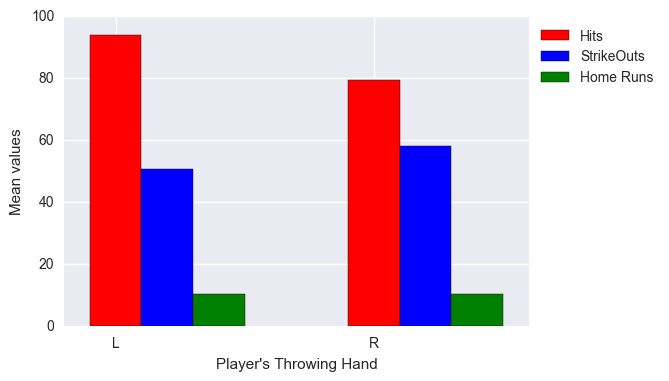

In [154]:
grouped_by_throwing_hand = pitching_stats_cleaned.groupby('throws')
x_pos = np.arange(len(grouped_by_throwing_hand['throws']))
w = 0.2
# width of the bars in my bar chart
plt.bar(x_pos, grouped_by_throwing_hand.mean()['H'], label='Hits', color = 'red', width = w, align = 'center')
plt.bar(x_pos+w, grouped_by_throwing_hand.mean()['SO'], label='StrikeOuts', color = 'blue', width = w, align = 'center')
plt.bar(x_pos+(w*2), grouped_by_throwing_hand.mean()['HR'], label='Home Runs', color = 'green', width = w, align = 'center')
plt.xticks(x_pos, [ind for ind, grp in grouped_by_throwing_hand['throws']])
plt.xlabel("Player's Throwing Hand")
plt.ylabel("Mean values")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

From the above bar chart, we can observe that:
1. The mean values for home runs are almost the same for both players throwing with left and right.
2. The mean value of Strikeouts is more for right handed throwers that left handed throwers where as the mean value of hits is more for left handed throwers.
3. Thus, we see that the player's throwing hand has an affect on the hits and Strikeouts but not on home runs.

Limitations for Analysis 2 & 3: 
1. I have assumed that the player's performance is measured in terms of Mean Hits, Runs and Home runs scored (in analysis 2) and mean Hits, Homeruns allowed and Strikeouts (in analysis 3). However, we can choose any other variable to measure performance which may lead to different results.
2. I have found a correlation between player's batting and throwing hands and the above mentioned variables. This does not imply causation i.e, this does not show that left / right handed players are better performers.

### Analysis 4:
Question: Does the win-to-loss ratio for a manager have an affect on the the number of times a manager has won the BBWAA award?

In [155]:
manager_awards_df = pd.read_csv("AwardsManagers.csv")
manager_awards_BBWAA = manager_awards_df.query('awardID == "BBWAA Manager of the Year"')
grouped_awards_manager = manager_awards_BBWAA.groupby('playerID', as_index=False).mean()
playerID_list = manager_awards_BBWAA['playerID']
# list of player IDs of managers who won the "BBWAA Manager of the Year" award

In [156]:
managers_df = pd.read_csv("Managers.csv")
managers_df_Filtered = managers_df[managers_df.playerID.isin(playerID_list)]
# keep only in the manager_df who won the "BBWAA Manager of the Year" award
grouped_managers = managers_df_Filtered.groupby('playerID', as_index=False).mean()
manager_stats = grouped_awards_manager.merge(grouped_managers, on='playerID', how='inner')[['playerID', 'G', 'W', 'L']]
manager_stats['Win_Loss_Ratio'] = pd.Series(manager_stats.W/manager_stats.L)
# Calculate win-loss-ratio for each manager and append it to the dataframe- manager_stats

In [157]:
# Let's explore this data:
manager_stats.head()

,playerID,G,W,L,Win_Loss_Ratio
0,aloufe01,146.714286,73.785714,72.928571,1.011753
1,andersp01,155.000000,84.384615,70.538462,1.196292
2,bakerdu01,158.952381,84.095238,74.809524,1.124125
3,banisje01,162.000000,91.500000,70.500000,1.297872
4,baylodo01,146.333333,69.666667,76.555556,0.910015


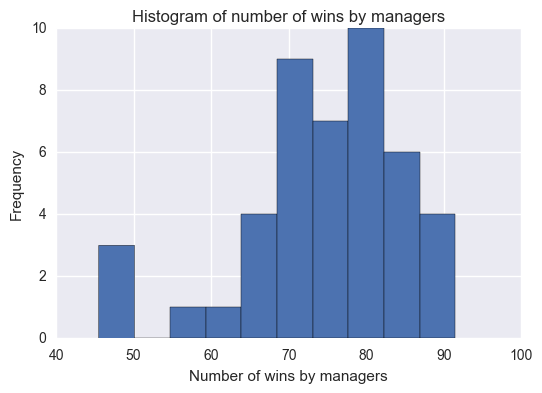

In [158]:
# Histogram of wins:
plt.hist(manager_stats.W)
plt.xlabel('Number of wins by managers')
plt.ylabel('Frequency')
plt.title('Histogram of number of wins by managers')

In [159]:
manager_stats.W.describe()

count    45.000000
mean     74.669635
std      10.537407
min      45.500000
25%      69.666667
50%      75.833333
75%      81.318182
max      91.500000
Name: W, dtype: float64

Description: The above histogram of number of wins by managers shows that this distribution is almost a normal distribution. Most of the managers have wins between 70 - 90.

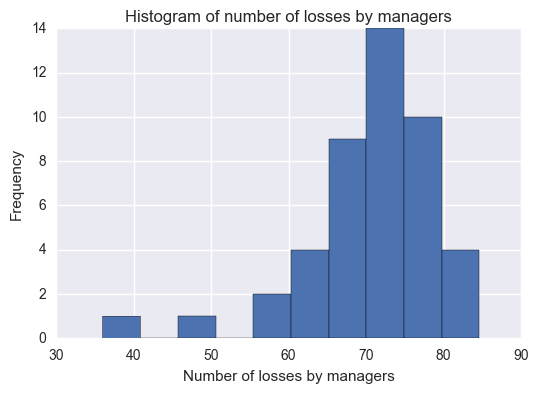

In [160]:
# Histogram of losses:
plt.hist(manager_stats.L)
plt.xlabel('Number of losses by managers')
plt.ylabel('Frequency')
plt.title('Histogram of number of losses by managers')

In [161]:
manager_stats.L.describe()

count    45.000000
mean     70.534938
std       8.736079
min      36.000000
25%      67.818182
50%      72.500000
75%      76.000000
max      84.600000
Name: L, dtype: float64

Description: The above histogram of number of losses by managers shows that this distribution is negatively skewed.

In [162]:
# To check if there are any null values in the dataframe:
manager_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 5 columns):
playerID          45 non-null object
G                 45 non-null float64
W                 45 non-null float64
L                 45 non-null float64
Win_Loss_Ratio    45 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


As I have already filtered out our data, we see that there are no null values in the filtered dataframe.

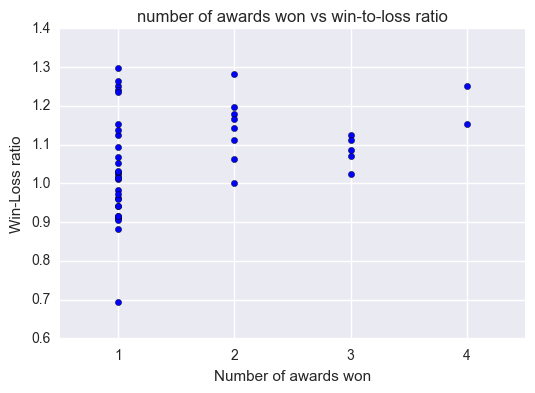

In [163]:
number_of_awards = manager_awards_BBWAA.groupby('playerID').size()
# number of "BBWAA Manager of the Year" awards won by each manager
number_of_awards = number_of_awards.reset_index(drop=True)
manager_stats['num_awards'] = number_of_awards
# Scatter Plot: number of "BBWAA Manager of the Year" awards won vs win-to-loss ratio
plt.scatter(manager_stats['num_awards'], manager_stats['Win_Loss_Ratio'])
plt.title("number of awards won vs win-to-loss ratio")
plt.xlabel("Number of awards won")
plt.xticks([1,2,3,4])
plt.ylabel("Win-Loss ratio")

From the above Scatter Plot, we can observe the following:
1. The maximum number of "BBWAA Manager of the Year" awards won by a manager is 4 and two managers have been able to win it 4 times.
2. Managers who managed to win the award more than once have a win-loss ratio more than 1.0

In [164]:
# To calculate the mean win-loss ratio for each number of awards won 
grouped_by_number_of_awards = manager_stats.groupby('num_awards').mean()['Win_Loss_Ratio']
print grouped_by_number_of_awards

num_awards
1    1.031463
2    1.141994
3    1.083602
4    1.202431
Name: Win_Loss_Ratio, dtype: float64


Above, we can see that the highest mean win-loss ratio is for the managers who won the award 4 times. But, it does not show that as win-loss ratio increases, the number of awards won will increase.

Limitations: I am looking at the correlation between win-loss ratio and the number of times a manager wins the "BBWAA Manager of the Year" award. This does not imply causation.


__Conclusion:__
In this project I have analyzed the performance of teams, players and managers by selecting a few variables and seeing the correlation between them. The process I followed was: to load the data, explore its contents, analyze the data with visualizations and find correlations between variables. Some of the variables were strongly correlated, meaning that it had a noticable affect on the performance of the team/player/manager, but it does not imply causation. Some variables were not so strongly correlated. 